A continuação apresento a curva de luz normalizada com menor **rms** obtida com o polyfit (out_lc_from_p_ra_poli_g3_f1.dat), antes de aplicar a media deslizante.

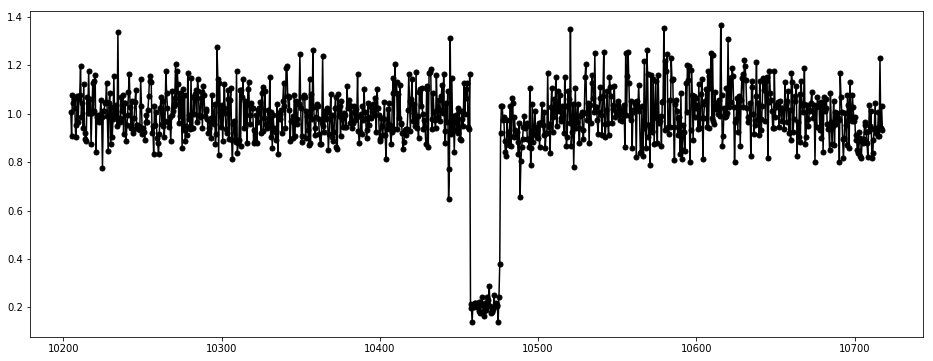

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_table('out_lc_from_p_ra_poli_g3_f1.dat',sep='\s+', header=None)
#df.describe() # mostra a estadistica das colunas
fig = plt.figure(figsize=(16,6))
plt.plot(df[0], df[1], 'ko-', color='black', markersize=5) 
# df[0]: tempo
# df[1]: fluxo
plt.show()

### Resultados de aplicar a media deslizante

O pandas de python permite aplicar a media deslizante com o seguinte comando. 

df[2] = df[1].rolling(window=2,center=False).mean()

Ele cria uma nova coluna df[2] com os valores da media deslizante. 

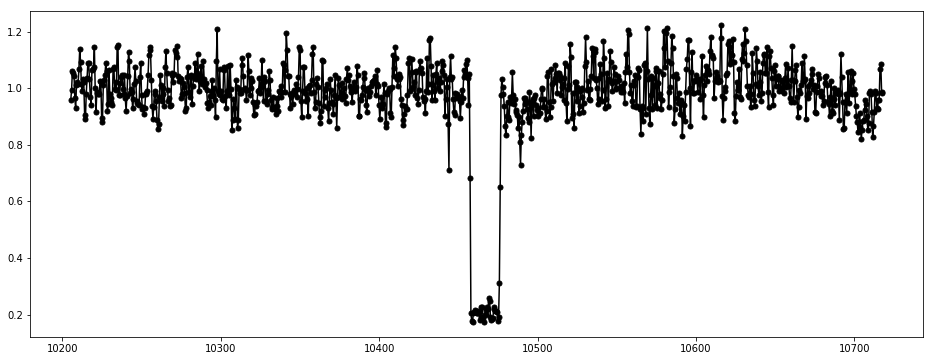

In [2]:
# tomando em comta dois pontos (windows = 2)
df[2] = df[1].rolling(window=2,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[2], 'ko-', color='black', markersize=5)
plt.show()

A continuação mostro a superposição da curva original e a curva obtida com a media deslizante para dois pontos

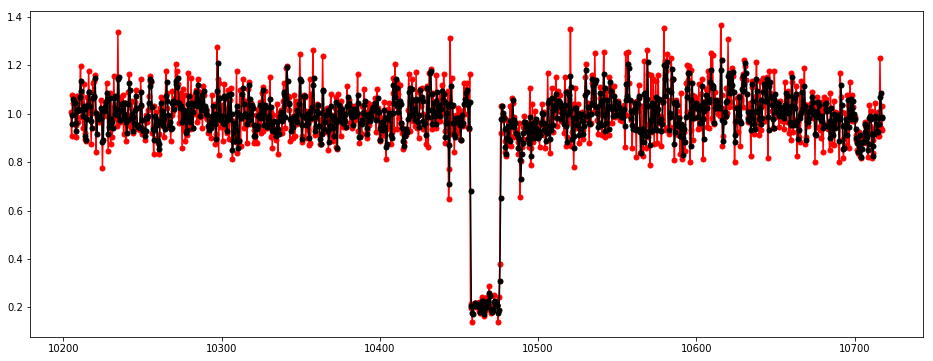

In [3]:
df[2] = df[1].rolling(window=2,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=5)   # com media deslizante
plt.show()

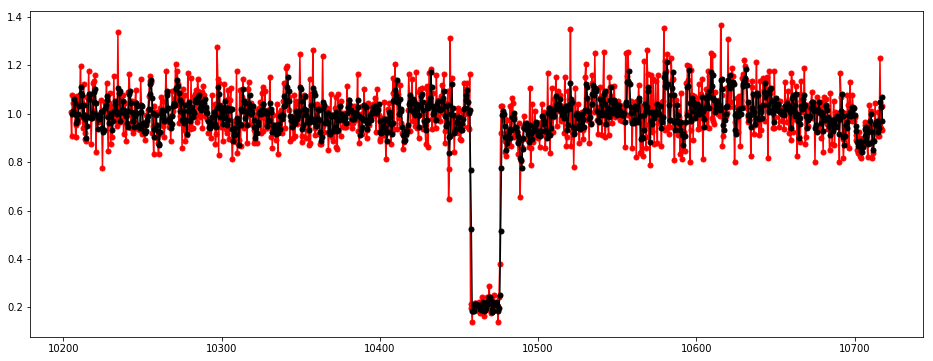

In [4]:
# tomando em comta treis pontos (windows = 3)
df[2] = df[1].rolling(window=3,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

Da figura pode-se ver que a media deslizante com treis pontos afeta a sinal do anel.

# Media deslizante para 5 pontos

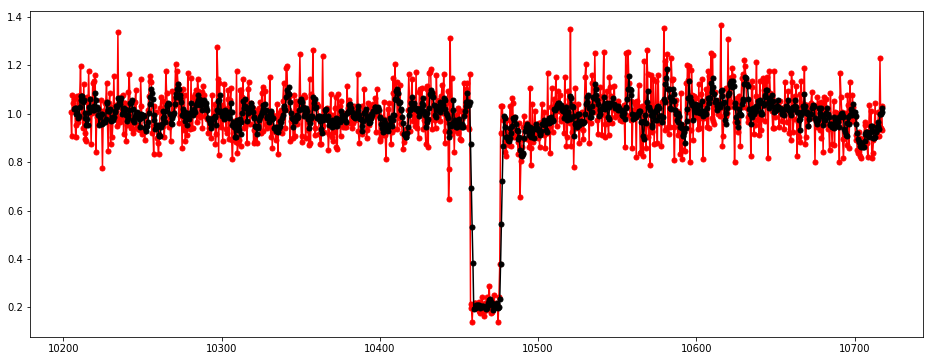

In [32]:
# tomando em comta treis pontos (windows = 5)
df[2] = df[1].rolling(window=5).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

Pode-se ver que para 5 pontos os aneis já não são percibidos

# Media deslizante com o peso do sigma

$$ \frac{(P1+P2)}{(2*\sigma)}= \frac{media}{\sigma}$$

Usei a seguinte formula para calcular o sigma

$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_{i} - \mu)^{2}}$$

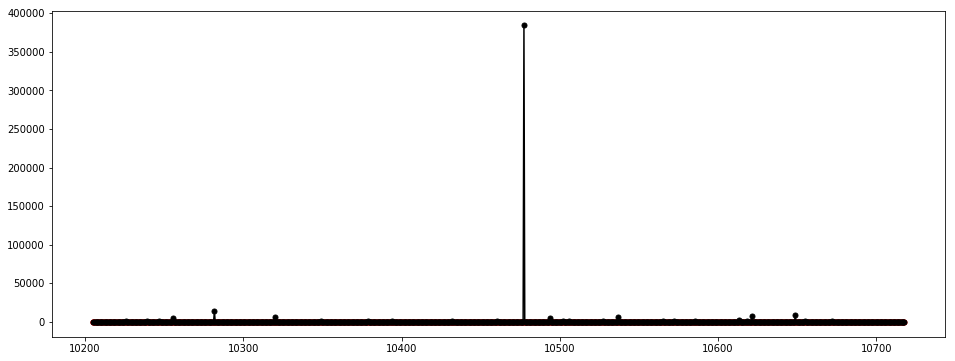

In [28]:
# para 2 pontos
df[2] = df[1].rolling(window=2).std(ddof=0) # sigma
df[3] = df[1].rolling(window=2).mean() # media
df[4] = df[3]/df[2]
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

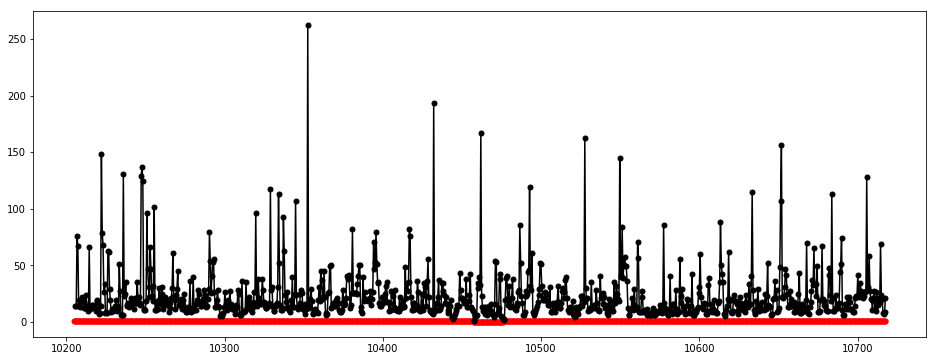

In [29]:
# para 3 pontos
df[2] = df[1].rolling(window=3).std(ddof=0) # sigma
df[3] = df[1].rolling(window=3).mean() # media
df[4] = df[3]/df[2]
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

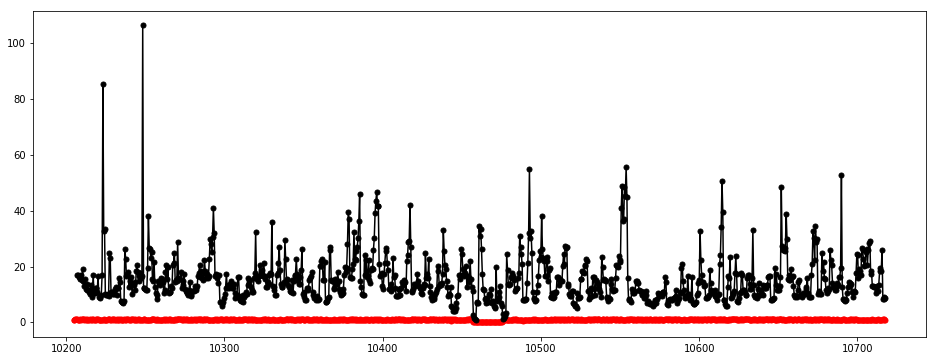

In [30]:
# para 5 pontos
df[2] = df[1].rolling(window=5).std(ddof=0) # sigma
df[3] = df[1].rolling(window=5).mean() # media
df[4] = df[3]/df[2]
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=5) # media deslizante
plt.show()